# ForwardTEM with IP effects

This tutorial expands on the first one (`tutorial_ForwardTEM.ipynb`), so please read it for more details on the basics.

The same class is used but with different settings to consider IP effects.

### Attention
The `tracking` (multiple plots in the same figure) only works between the same type of model.
More on this later.

## Setup
Stays the same as before:

In [1]:
import numpy as np
from TEM_forward.modeller import ForwardTEM
forward_solver = ForwardTEM()

## Settings
The settings stay mostly the same. Only in **Modelling settings** a new parameter is added.

### Device settings
The `TEM-FAST` device has different settings for the measurements which are also considered for the modelling:
- Timekey (`timekey`): integer,  
A number from 1 to 9 which determines the number of timegates used. The default is 9.
- Selected current (`currentkey`): integer,  
If the device should inject 1 or 4 A of current. The default is 1.
- Loopsize (`loop`): float,  
The side lenght in Meters of the square loop. The default is 12.5.
- Injected Current (`current_inj`): float,  
If an measurment was performed, the current, which was actually injected by the device can be added here. This resorts to the theoretical injected current (`currentkey`) as the default.
- Powerline filter (`filter_powerline`): integer,  
If 50 or 60 Hz frequency should be filtered. The default is 50.

### Modelling settings
Settings which are relevant for the modelling:
- Type of subsurface model (`model_type`): str
Which type of (complex) resistivty model is used for the calculations.
It is per default set to `None`, which expects a simple resistivity model (only thickness and resistivity).
The different resistivity models can added easier with the corresponding `add_..._model()` methods.
- The resistivity model (`model`): numpy.array() or list
The model of the layered subsurface containing the thickness and resistivity of each layer.
This can be added easier with the `add_..._model()` method.
- An absolute error (`absolute_error`): float
An absolute error used to simulate a random error. The default is 1e-28.
- An relative error (`relative_error`): float
A relative error used to simulate a random error. The default is 1e-6.

### Plotting settings
For the creation of the plots more things can be changed:
- Add a title to the plot (`plot_title`): str
Adds a super title to the whole figure.
- Keep plotting on the same figure (`track`): boolean, 
When modelling different models, the results can be plotted on the same figure or a new figure is created for every model. The default is `False`. This means a new plot is created for each model.
- Convert to Conductivity (`res2con`): boolean,  
If the results should be plotted as resistivity or conductivity. The default is `False`. This means, that the resistivities are plotted.
- Ax limits for time (`time_limits`): tuple of two numbers,  
Gives an lower and upper limit for the time axis in the plots. The default is None (`matplotlib` chooses).
- Ax limits for signal (`signal_limits`): tuple of two numbers,  
Gives an lower and upper limit for the signal axis in the plots. The default is None (`matplotlib` chooses).
- Ax limits for apparent resistivity/conductivity (`rhoa_limits`): tuple of two numbers,  
Gives an lower and upper limit for the apparent resistivity/conductivity axis in the response plot. The default is None (`matplotlib` chooses).
- Ax limits for model resistivity/conductivity (`rho_limits`): tuple of two numbers,  
Gives an lower and upper limit for the resistivity/conductivity axis in the model plot. The default is None (`matplotlib` chooses).
- Ax limits for model depth (`depth_limits`): tuple of two numbers,  
Gives an lower and upper limit for the depth axis in the model plot. The default is None (`matplotlib` chooses).

### Example
Let's keep the setting from before:

In [2]:
# Set loop size in meters (side length of the square loop)
forward_solver.loop = 6.25

# Choose the current key: 1 or 4 (A)
forward_solver.currentkey = 4

# Choose time key: 1 - 9 (number of timegates)
forward_solver.timekey = 3

### Adding a model

Currently there are 3 class-methods of adding a model:
- `add_resistivity_model()`: The simple model without IP effects from before.
- `add_pelton_model()`: The pelton model for complex resistivity.
- `add_mpa_model()`: The max phase angle model for complex resistivity.
Using these functions the `model_type` is automatically set to the correct type.

Let's start with the max phase angle model which takes 5 parameters:

In [3]:
# Thickness of each layer in meters
thk = [5, 15, 10]

# Direct current resistivity of each layer in Ohm meters
rho_0 = [50, 10, 500]

# Max phase angle of each layer in radians
phi_max = [0, 0.8, 0]

# Relaxation time of each layer in seconds
tau_phi = [1e-6, 5e-4, 1e-6]

# Dispersion coefficient of each layer
c = [0.1, 0.9, 0.1]

# Add the max phase angle model
forward_solver.add_mpa_model(
    thickness=thk, 
    resistivity=rho_0,
    max_phase_angle=phi_max,
    relaxation_time=tau_phi,
    dispersion_coefficient=c)

### Run the modeller
Now you can finally run the forward modeller and create some plots.


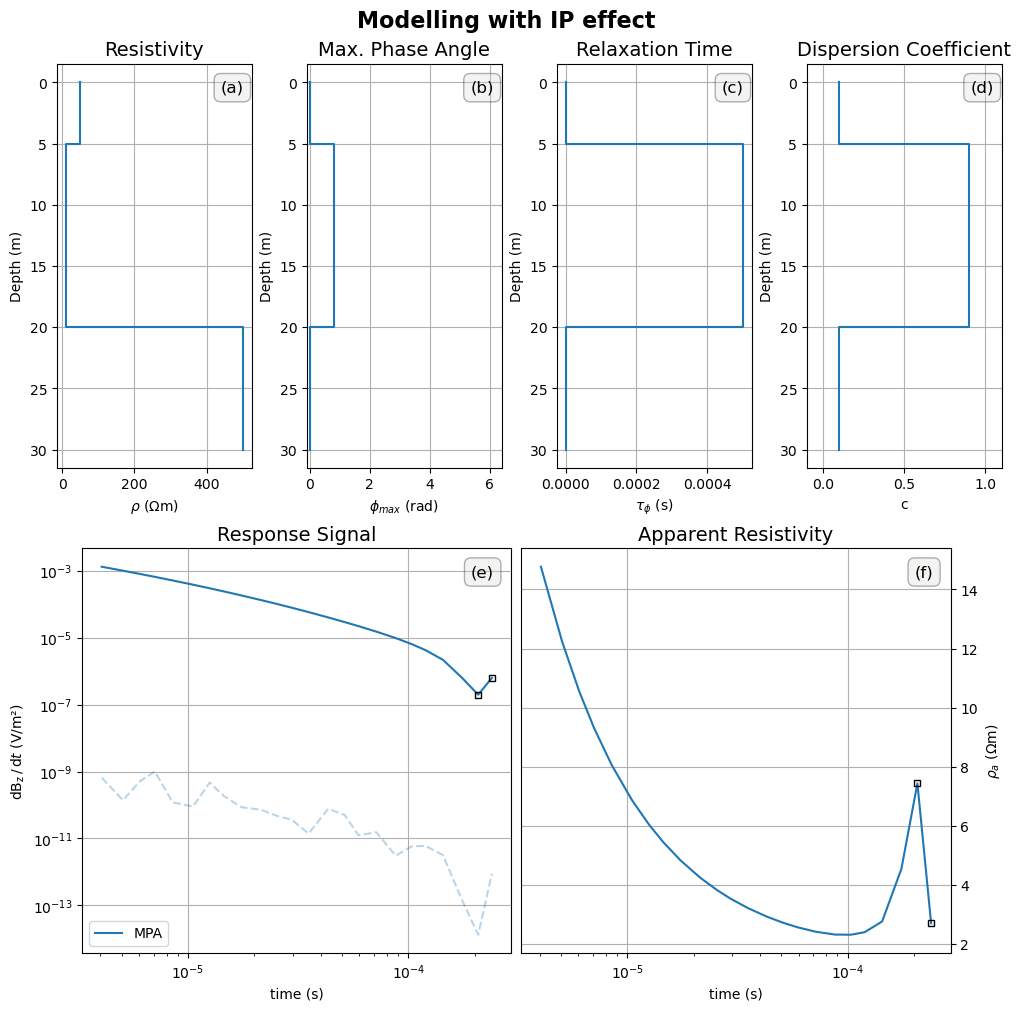

In [4]:
# Add a title to the plot
forward_solver.plot_title = 'Modelling with IP effect'

# Run the forward modeller
forward_solver.run('MPA')

You can also plot the same values in the pelton model:

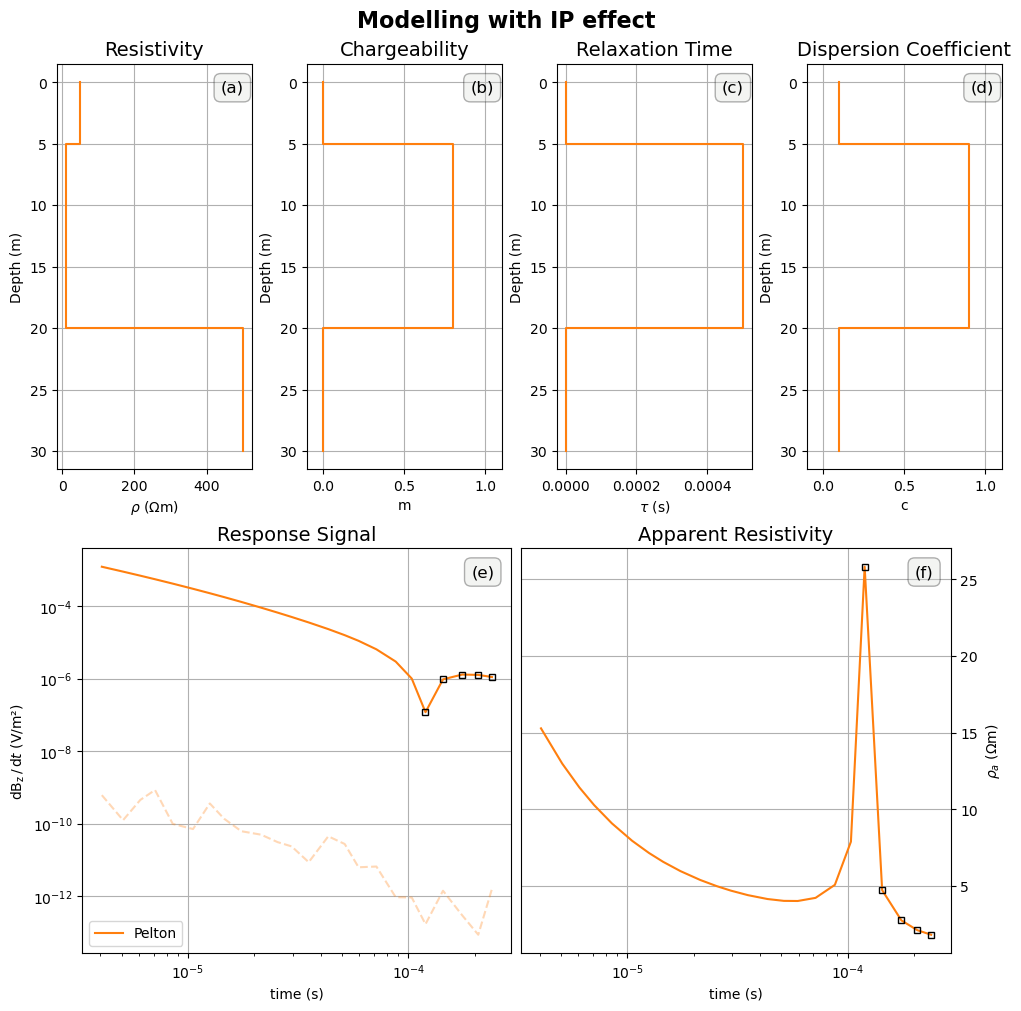

In [5]:
# Thickness of each layer in meters
thk = [5, 15, 10]

# Direct current resistivity of each layer in Ohm meters
rho_0 = [50, 10, 500]

# Chargeability of each layer
m = [0, 0.8, 0]

# Relaxation time of each layer in seconds
tau = [1e-6, 5e-4, 1e-6]

# Dispersion coefficient of each layer
c = [0.1, 0.9, 0.1]

# Add the max phase angle model
forward_solver.add_pelton_model(
    thickness=thk, 
    resistivity=rho_0,
    chargeability=m,
    relaxation_time=tau,
    dispersion_coefficient=c)


forward_solver.run('Pelton')